In [53]:
import pandas as pd

# Load the preprocessed, scaled dataset (without labels)
file_path = "clustering_preprocessing_robust_scaled.csv"
df = pd.read_csv(file_path)

# Preview the data
print(df.shape)
df.head()

(2078, 19)


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,-1.0,-0.305183,-0.587756,-0.458016,0.0,-1.0,-0.39728,0.000000,0.0,0.0,0.000000,0.0,-0.644237,0.369134,-1.0,0.0,0.0,0.0,0.0
1,-1.0,-0.305183,-1.306126,-0.648137,0.0,-1.0,0.60272,0.000000,0.0,1.0,1.139397,1.0,1.288474,-0.630866,0.0,0.0,0.0,0.0,0.0
2,0.0,0.023948,0.705310,-0.149071,0.0,-1.0,-0.39728,0.000000,0.0,0.0,0.000000,0.0,0.644237,0.369134,1.0,0.0,0.0,0.0,0.0
3,0.0,0.682209,0.705310,0.088580,-1.0,-1.0,0.60272,0.000000,0.0,0.0,0.000000,0.0,0.644237,-0.630866,1.0,0.0,0.0,-1.0,1.0
4,0.0,-0.140618,0.561636,0.155122,-1.0,-1.0,-0.39728,-6.725583,0.0,0.0,0.000000,0.0,-0.644237,-0.630866,0.0,0.0,0.0,0.0,0.0


## Determine the Best Number of Clusters (for KMeans)

In [55]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd

features = df.copy()
inertias = []
silhouettes = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(features)
    
    inertia = kmeans.inertia_
    silhouette = silhouette_score(features, labels)
    
    inertias.append(inertia)
    silhouettes.append(silhouette)

# Create summary table
comparison_df = pd.DataFrame({
    'k': list(k_range),
    'Inertia': inertias,
    'Silhouette Score': silhouettes
})

print(comparison_df)

    k       Inertia  Silhouette Score
0   2  11993.074795          0.503664
1   3  10547.265704          0.251076
2   4   9459.024210          0.213398
3   5   8471.965153          0.223560
4   6   7781.356304          0.201207
5   7   7329.356639          0.186209
6   8   6994.773586          0.179529
7   9   6722.855840          0.184874
8  10   6500.794327          0.180772


#### Observations:
1. Inertia decreases consistently with increasing k, as expected in KMeans.
2. Silhouette Score peaks at k = 2 (0.5037), indicating the best separation between clusters.
3. After k = 2, the silhouette score drops sharply, suggesting that additional clusters may be less meaningful.
4. k = 3 shows a good drop in inertia but at the cost of cluster quality (Silhouette drops to 0.2511).
Scores for k ≥ 4 remain low and relatively flat, indicating poor separation.

####  Conclusion:
Based on the balance between compactness (Inertia) and separation (Silhouette), k = 2 is the optimal choice for this dataset.

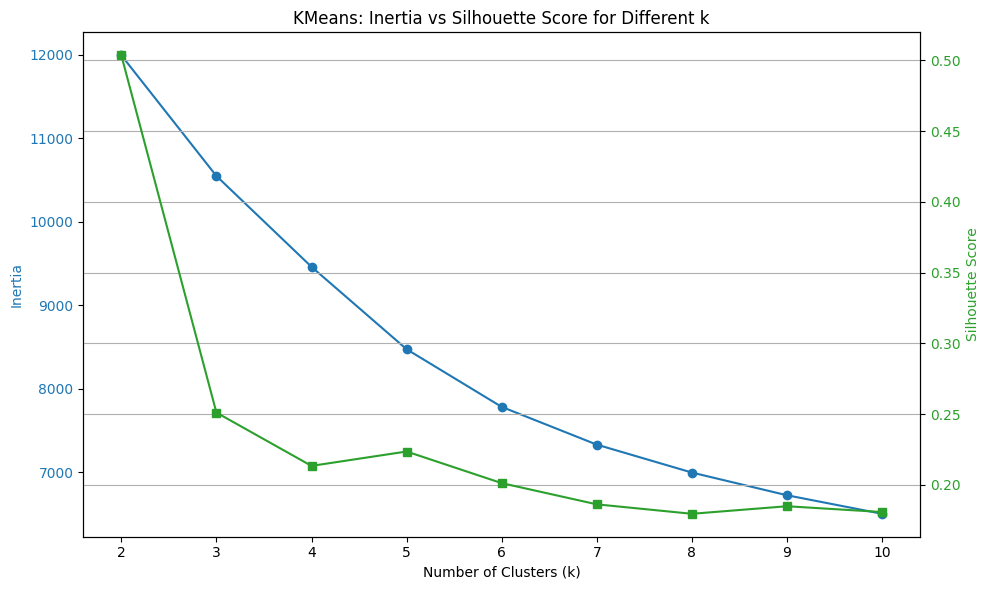

In [56]:
import matplotlib.pyplot as plt

# Plot Inertia and Silhouette Score
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Inertia on the left y-axis
color = 'tab:blue'
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia', color=color)
ax1.plot(comparison_df['k'], comparison_df['Inertia'], marker='o', color=color, label='Inertia')
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for Silhouette Score
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Silhouette Score', color=color)
ax2.plot(comparison_df['k'], comparison_df['Silhouette Score'], marker='s', color=color, label='Silhouette Score')
ax2.tick_params(axis='y', labelcolor=color)

# Title and layout
plt.title('KMeans: Inertia vs Silhouette Score for Different k')
fig.tight_layout()
plt.grid(True)
plt.show()


#### Observation: Inertia vs Silhouette Score for Different k
1. Inertia Curve (Blue Line):Shows a consistent downward trend as k increases from 2 to 10.
    The elbow point is most visible at k = 3, where the rate of decrease starts to flatten — a classic indicator for potential optimal clusters.

2. Silhouette Score Curve (Green Line):
    Peaks at k = 2 (0.50) — indicating the best-defined clusters.
    Drops sharply to ~0.25 at k = 3, and continues to decline slightly or fluctuate at lower values as k increases.
    Low silhouette scores beyond k = 3 suggest overlapping or poorly separated clusters.

3. Trade-off Insight:
    While k = 3 gives better inertia (compactness), it sacrifices cluster separability.
    k = 2 is the most balanced choice with high silhouette score and acceptable inertia.

## Model Fitting and Cluster Assignment

In [57]:
# Fit KMeans with k=2
kmeans_final = KMeans(n_clusters=2, random_state=42, n_init=10)
df['Cluster'] = kmeans_final.fit_predict(df)

# Print first few rows of the labeled DataFrame
print(df.head())

   Gender       Age    Height    Weight  family_history_with_overweight  FAVC  \
0    -1.0 -0.305183 -0.587756 -0.458016                             0.0  -1.0   
1    -1.0 -0.305183 -1.306126 -0.648137                             0.0  -1.0   
2     0.0  0.023948  0.705310 -0.149071                             0.0  -1.0   
3     0.0  0.682209  0.705310  0.088580                            -1.0  -1.0   
4     0.0 -0.140618  0.561636  0.155122                            -1.0  -1.0   

      FCVC       NCP  CAEC  SMOKE      CH2O  SCC       FAF       TUE  CALC  \
0 -0.39728  0.000000   0.0    0.0  0.000000  0.0 -0.644237  0.369134  -1.0   
1  0.60272  0.000000   0.0    1.0  1.139397  1.0  1.288474 -0.630866   0.0   
2 -0.39728  0.000000   0.0    0.0  0.000000  0.0  0.644237  0.369134   1.0   
3  0.60272  0.000000   0.0    0.0  0.000000  0.0  0.644237 -0.630866   1.0   
4 -0.39728 -6.725583   0.0    0.0  0.000000  0.0 -0.644237 -0.630866   0.0   

   MTRANS_Bike  MTRANS_Motorbike  MTRANS_Pub

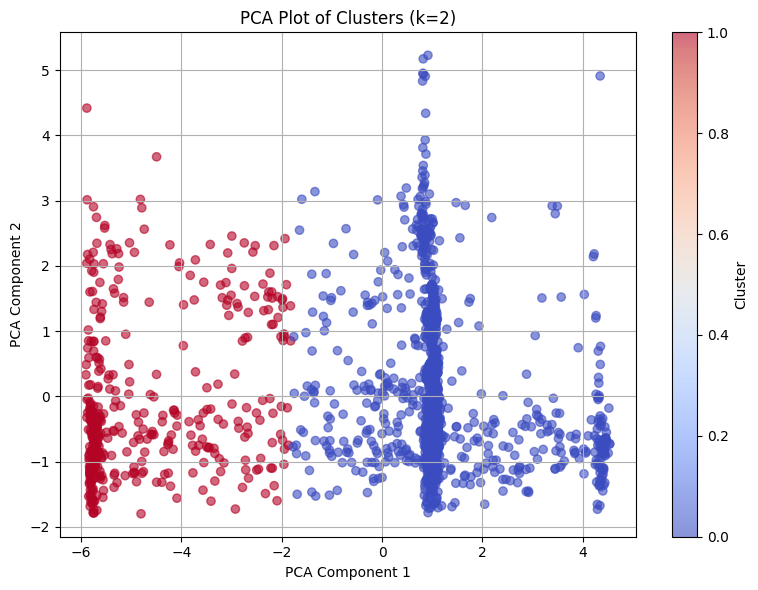

In [62]:
# Drop 'Cluster' for PCA
features = df.drop(columns=['Cluster'])

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features)

# Plot PCA result
plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df['Cluster'], cmap='coolwarm', alpha=0.6)
plt.title('PCA Plot of Clusters (k=2)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


#### Observation: PCA Visualization of Clusters (k=2)
1.The PCA plot shows clear separation between Cluster 0 (blue) and Cluster 1 (red) along PCA Component 1.

2.Cluster 0 (blue) is spread from center to the right, while Cluster 1 (red) dominates the left side.

3.The clusters are well-partitioned, indicating meaningful structural differences in the original feature space.

4.There is some vertical overlap along PCA Component 2, but the horizontal spread confirms strong distinction driven by key features.

PCA Plot Shows:

1. Clear separation between Cluster 0 and Cluster 1, especially on PCA Component 1.

2. Confirms that your clustering result (k=2) has meaningful structure.

## Cluster-wise Feature Mean Analysis/cluster profiling

In [43]:
# Analyze characteristics of each cluster
cluster_summary = df.groupby('Cluster').mean().T
print(cluster_summary)


Cluster                                0         1
Gender                         -0.482036 -0.549020
Age                             0.230407  0.327168
Height                          0.077872 -0.275725
Weight                          0.141089 -0.127909
family_history_with_overweight -0.161677 -0.220588
FAVC                           -0.116766 -0.112745
FCVC                            0.036855 -0.025724
NCP                             0.152487 -5.681848
CAEC                            0.150898  0.122549
SMOKE                           0.021557  0.019608
CH2O                            0.033685 -0.099027
SCC                             0.044910  0.051471
FAF                             0.029131 -0.072281
TUE                             0.034253  0.026013
CALC                           -0.234132 -0.416667
MTRANS_Bike                     0.004192  0.000000
MTRANS_Motorbike                0.005389  0.004902
MTRANS_Public_Transportation   -0.255689 -0.245098
MTRANS_Walking                 

#### Observations:
1. Cluster 0:
    Higher average height, weight, and physical activity
    Better hydration and vegetable intake
    Slightly healthier lifestyle indicators overall

2. Cluster 1:
    Slightly older on average
    Significantly lower NCP (−5.68) suggests a possible data issue or under-eating behavior
    Lower physical activity and water intake
    Higher negative value for alcohol consumption (CALC)

<Figure size 1400x600 with 0 Axes>

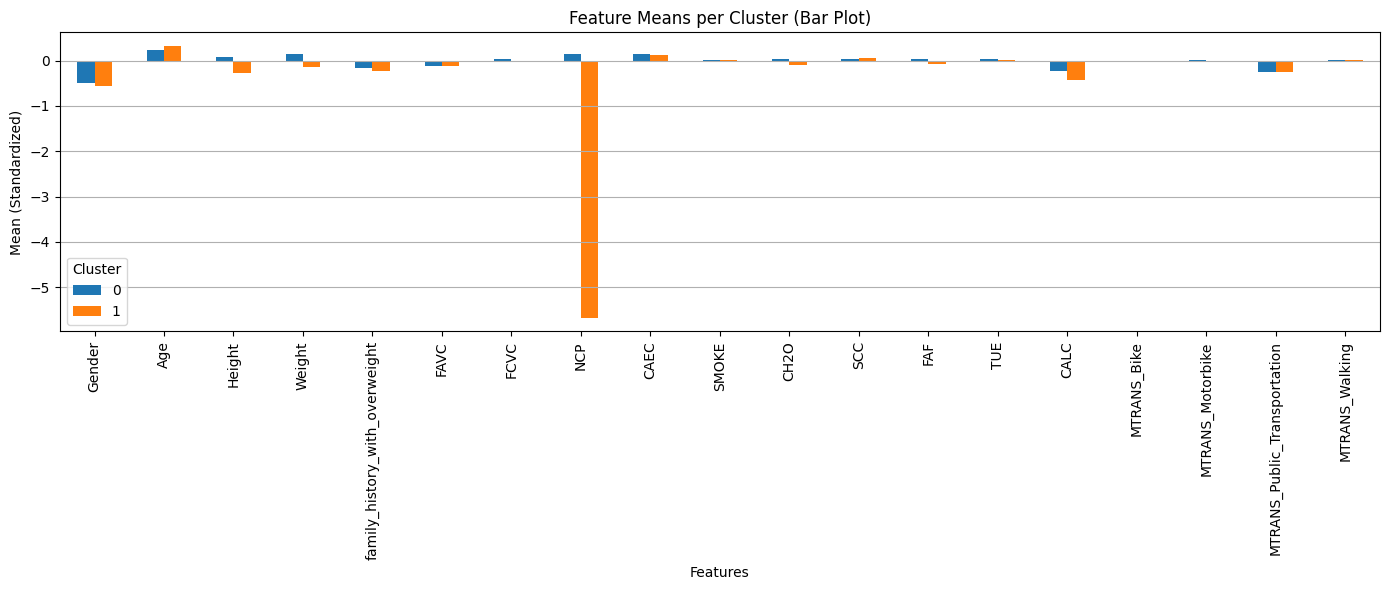

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

# Group by cluster and calculate means
cluster_means = df.groupby('Cluster').mean()

# ==============================
# Bar Plot
# ==============================
plt.figure(figsize=(14, 6))
cluster_means.T.plot(kind='bar', figsize=(14, 6))
plt.title("Feature Means per Cluster (Bar Plot)")
plt.xlabel("Features")
plt.ylabel("Mean (Standardized)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


#### Observation: 
1. The extreme drop in NCP for Cluster 1 dominates the visual distribution, indicating a strong differentiator.
2. Cluster 0 appears more balanced across lifestyle features, while Cluster 1 may reflect less healthy or irregular behavior patterns.

## Analyze Variability (Standard Deviation)

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

cluster_std = df.groupby('Cluster').std().T

print("Standard Deviation (Variability) within Clusters:")
print(cluster_std)

Standard Deviation (Variability) within Clusters:
Cluster                                0         1
Gender                          0.499827  0.498202
Age                             1.033257  1.109693
Height                          0.646330  0.685616
Weight                          0.644409  0.460427
family_history_with_overweight  0.368264  0.415152
FAVC                            0.321238  0.316669
FCVC                            0.544635  0.490833
NCP                             1.028056  1.309489
CAEC                            0.453978  0.475112
SMOKE                           0.145275  0.138819
CH2O                            0.692919  0.677925
SCC                             0.207169  0.221227
FAF                             0.552189  0.534481
TUE                             0.590140  0.675845
CALC                            0.494096  0.580533
MTRANS_Bike                     0.064626  0.000000
MTRANS_Motorbike                0.073235  0.069928
MTRANS_Public_Transportation    

#### Observation: Cluster Variability (Standard Deviation)
1. Age and NCP (meal frequency) show the highest variability in both clusters, especially in Cluster 1 (NCP: 1.31).
2. Cluster 0 shows more variation in Weight, while Cluster 1 has higher variability in TUE (tech use) and CALC (alcohol consumption).
3. CH2O and FAF show moderate spread across both clusters, indicating diverse hydration and activity habits.
4. Features like SMOKE, FAVC, and MTRANS_Walking have consistently low variability, suggesting stable behaviors.
5. MTRANS_Bike is non-variable in Cluster 1 (0.000), indicating no users opted for biking there.

##### Cluster 1 shows slightly more variability overall, especially in eating habits and tech use, while Cluster 0 is more consistent in lifestyle patterns.

## Percentage of data points in each cluster

In [60]:
import pandas as pd

# Assuming df already contains the 'Cluster' column from KMeans
# If not, load and assign clusters first

# Calculate percentage of each cluster
cluster_percentages = df['Cluster'].value_counts(normalize=True) * 100
cluster_percentages = cluster_percentages.sort_index().round(2)

# Print the results
print("Percentage of data points in each cluster:")
print(cluster_percentages)


Percentage of data points in each cluster:
Cluster
0    80.37
1    19.63
Name: proportion, dtype: float64


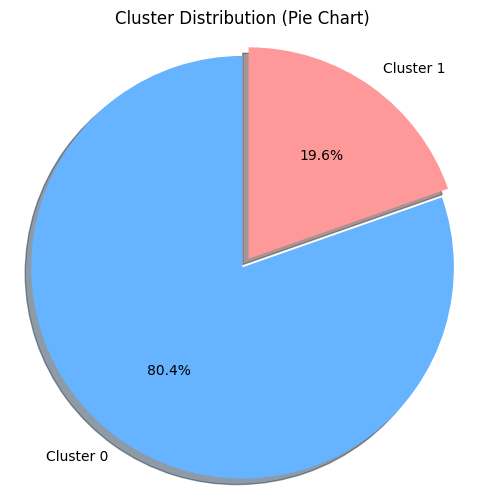

In [61]:
import matplotlib.pyplot as plt

# Calculate cluster percentages
cluster_percentages = df['Cluster'].value_counts(normalize=True) * 100
cluster_percentages = cluster_percentages.sort_index().round(2)

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(cluster_percentages, 
        labels=[f'Cluster {i}' for i in cluster_percentages.index],
        autopct='%1.1f%%', 
        startangle=90, 
        colors=['#66b3ff', '#ff9999'], 
        explode=(0.05, 0), 
        shadow=True)
plt.title("Cluster Distribution (Pie Chart)")
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular
plt.show()

#### Observation : 
1. Cluster 0 accounts for the majority of the dataset (80.4%), suggesting it represents the dominant group with common characteristics.

2. Cluster 1 comprises only 19.6% of the data, likely representing a distinct minority group — possibly with unique 

## Evaluation of Kmeans: 

In [51]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import KMeans
import pandas as pd

# Drop existing cluster column if needed
if 'Cluster' in df.columns:
    df = df.drop(columns=['Cluster'])

# Use all features
features = df.copy()

# Fit final KMeans model with k=2
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
labels = kmeans.fit_predict(features)

# Calculate evaluation metrics
silhouette = silhouette_score(features, labels)
davies_bouldin = davies_bouldin_score(features, labels)
calinski_harabasz = calinski_harabasz_score(features, labels)

# Print results
print("KMeans Evaluation Metrics (k=2):")
print(f"Silhouette Score        : {silhouette:.4f}")
print(f"Davies-Bouldin Index    : {davies_bouldin:.4f}")
print(f"Calinski-Harabasz Index : {calinski_harabasz:.2f}")


KMeans Evaluation Metrics (k=2):
Silhouette Score        : 0.5037
Davies-Bouldin Index    : 0.8034
Calinski-Harabasz Index : 1947.96


### Interpretation of KMeans Evaluation (k = 2)
The clustering model with 2 clusters demonstrates strong performance across all key evaluation metrics:

1. A Silhouette Score of 0.5037 indicates that most data points are well matched to their assigned cluster and distinctly separated from others.

2. The low Davies–Bouldin Index (0.8034) suggests minimal overlap between clusters, meaning the clusters are compact and clearly distinguishable.

3. A high Calinski–Harabasz Index (1947.96) reflects a favorable ratio of inter-cluster separation to intra-cluster variance — further validating the clustering structure.

These metrics collectively confirm that the clustering solution at k = 2 is both statistically sound and interpretable, making it a reliable foundation for downstream analysis, profiling, or modeling.


### Saving final file

In [64]:
# Store results in a DataFrame
evaluation_df = pd.DataFrame({
    'Metric': ['Silhouette Score', 'Davies-Bouldin Index', 'Calinski-Harabasz Index'],
    'Value': [round(silhouette, 4), round(davies_bouldin, 4), round(calinski_harabasz, 2)]
})

# Save to CSV
evaluation_df.to_csv("kmeans_evaluation_k2.csv", index=False)

print("\n Evaluation metrics saved to 'kmeans_evaluation_k2.csv'")


 Evaluation metrics saved to 'kmeans_evaluation_k2.csv'


### **Key Takeaways**
#### 🔍 **1. Finding the Optimal Number of Clusters**

* **Elbow method** showed a significant drop in inertia at `k = 3`, but diminishing gains after that.
* **Silhouette scores** peaked at **`k = 2 (0.5037)`**, indicating the best balance between compactness and separation.
* Based on both metrics, **`k = 2` was selected** for final modeling.

####  **2. Final KMeans Model (k = 2)**

* KMeans clustering was performed using all features.
* Cluster labels were assigned and added to the dataset.
* Distribution:

  * **Cluster 0**: 80.4% of records
  * **Cluster 1**: 19.6% of records

#### **3. Cluster Profiling**

* **Cluster 0**: Higher average height, weight, CH2O, and physical activity — likely healthier group.
* **Cluster 1**: Very low `NCP` (meal frequency) and slightly lower activity — possibly a distinct behavior group or anomaly.
* **Standard deviation analysis** showed that Cluster 1 had more variability in age, eating patterns, and tech use.

#### **4. PCA Visualization**

* PCA (applied after clustering) showed **clear separation** between the two clusters on the first component.
* Visual confirmation that the KMeans clustering captured meaningful structure in the data.

#### **5. Final Evaluation Metrics**

| Metric                  | Value   |
| ----------------------- | ------- |
| Silhouette Score        | 0.5037  |
| Davies–Bouldin Index    | 0.8034  |
| Calinski–Harabasz Index | 1947.96 |

* The metrics confirm that **`k = 2` clusters are well-separated and statistically valid**.

### **Conclusion**

The KMeans clustering pipeline successfully segmented the data into two well-defined clusters with strong internal structure, supported by visual evidence and evaluation metrics. Cluster profiling provides valuable insights into lifestyle differences across groups, setting the stage for targeted recommendations or downstream modeling.